# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as sct
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF
from IPython.display import Image

## Parte 1

### _Setup_ da parte 1

In [2]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [3]:
# Sua análise da parte 1 começa aqui.


In [4]:
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [5]:
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F2D9330>,
      dtype=object)

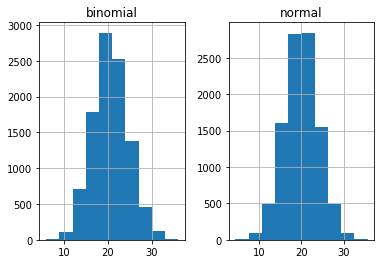

In [6]:
dataframe.hist()

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [7]:
def q1():
    # Retorne aqui o resultado da questão 1.
    q_normal = dataframe['normal'].quantile([0.25, 0.50, 0.75])
    q_binomial = dataframe['binomial'].quantile([0.25, 0.50, 0.75])
    resp = (q_normal - q_binomial).values
    resp = np.around(resp, decimals=3)
    return tuple(resp)   

In [8]:
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude? 

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?



- **Respostas**

 - Não. Eu esperava uma diferença maior entre quartis.

 - Valores próximos assim ocorrem pois média, desvio padrão, curstose, etc são muito semelhantes. 

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, **onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão**. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

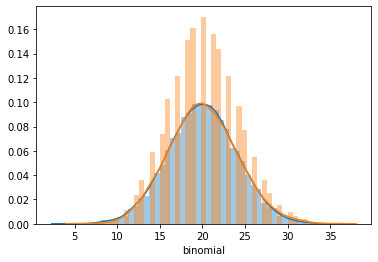

In [9]:
sns.distplot(dataframe.normal)
sns.distplot(dataframe.binomial)

In [10]:
# Passos para calcular a média amostral

# Calcula a média amostral da coluna normal
# Calcula o desvio padrão 
# Limite do intervalo inferior
# Cria ECDF
# Probabilidade

$[\bar{x} - s, \bar{x} + s]$

In [11]:
def q2():
    # Retorne aqui o resultado da questão 2.
    
    #Média
    media_normal = dataframe.normal.mean() 
    
    #Desvio padrão
    std_normal = dataframe.normal.std() 
    #Definindo a função
    ecdf = ECDF(dataframe.normal)
    return np.round(ecdf(media_normal + std_normal) - ecdf(media_normal - std_normal),3)  

In [12]:
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico? 
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

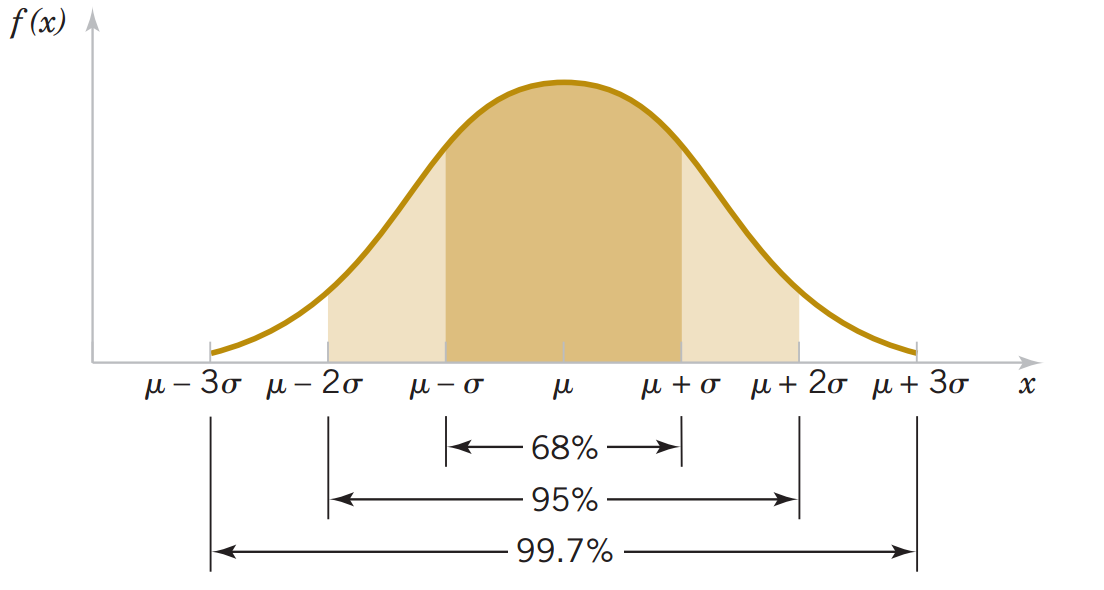

In [13]:
Image(filename= 'img/img_normal.png')

- **Respostas**

- Sim, O valor teórico é de 68%.

- Intervalo $[\bar{x} - 2s, \bar{x} + 2s]$

In [14]:
# Calculando a média
media_normal = dataframe.normal.mean() 

# Calculando o desvio padrão
std_normal = dataframe.normal.std() 

#Definindo a função
ecdf = ECDF(dataframe.normal)

#Calculando o Resultado
resultado = np.round(ecdf(media_normal + (2*std_normal)) - ecdf(media_normal - (2*std_normal)),3)
resultado

0.954

- Intervalo $[\bar{x} - 3s, \bar{x} + 3s]$

In [15]:
resultado_2 = np.round(ecdf(media_normal + (3*std_normal)) - ecdf(media_normal - (3*std_normal)),3)
resultado_2

0.997

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [17]:
def q3():
    # Retorne aqui o resultado da questão 3.
    
    # Média
    m_norm = dataframe.normal.mean()
    m_binom = dataframe.binomial.mean()
    
    #Variância
    v_norm = dataframe.normal.var()
    v_binom = dataframe.binomial.var()
       

    return tuple(np.round([m_binom - m_norm, v_binom - v_norm],3))

In [18]:
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude? 
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

- **Respostas**

- A média sim, pois é uma média de distribuição normal.

- A média irá mudar proporcionalmente.  





## Parte 2

### _Setup_ da parte 2

In [19]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [20]:
# Sua análise da parte 2 começa aqui.

In [21]:
stars.tail(2)

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
17895,114.507812,53.90240,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,False
17896,57.062500,85.79734,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,False


In [22]:
#Verificando os tipos de variáveis
stars.dtypes

mean_profile    float64
sd_profile      float64
kurt_profile    float64
skew_profile    float64
mean_curve      float64
sd_curve        float64
kurt_curve      float64
skew_curve      float64
target             bool
dtype: object

In [25]:
#Verifica os valores nulos das variáveis
stars.isna().sum()

mean_profile    0
sd_profile      0
kurt_profile    0
skew_profile    0
mean_curve      0
sd_curve        0
kurt_curve      0
skew_curve      0
target          0
dtype: int64

In [24]:
#Mostrar as informaçõs de um dataset
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mean_profile  17897 non-null  float64
 1   sd_profile    17897 non-null  float64
 2   kurt_profile  17897 non-null  float64
 3   skew_profile  17897 non-null  float64
 4   mean_curve    17897 non-null  float64
 5   sd_curve      17897 non-null  float64
 6   kurt_curve    17897 non-null  float64
 7   skew_curve    17897 non-null  float64
 8   target        17897 non-null  bool   
dtypes: bool(1), float64(8)
memory usage: 1.1 MB


In [26]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [27]:
def q4():
    # Retorne aqui o resultado da questão 4.
    
    #Filtra somente da coluna mean_profile que a variável target seja igual a 0
    mean_stars = stars.mean_profile[stars.target == 0]
    
    #Aplica a função Z para padronizar
    false_pulsar_mean_profile_standardized = (mean_stars - mean_stars.mean()) / mean_stars.std()
    
    # Aplicar a função Distribuição Cumulativa Empirica ao subset padronizado
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    
    #Retorna a probabilidade dos quartis
    return tuple(np.round(ecdf(sct.norm.ppf([0.8,0.9,0.95])),3))

In [31]:
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido? 
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`? 

- **Respostas**

- Sim, as probabilidades estão próximas aos valores dos quantis teóricos, ligeiramente mais altas.

- 80.6% de prob que a var seja <= 0.841621...e assim por diante.

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [32]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return tuple(np.round(np.quantile(false_pulsar_mean_profile_standardized,(0.25, 0.50, 0.75)) - sct.norm.ppf([0.25, 0.50, 0.75]),3))

In [33]:
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido? Sim, há pouca diferença.

* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`? 

* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.

- **Respostas**

- Sim, tem pouca diferença.
- O primeiro e o segundo quartil é ligeiramente maior na distribuição da variável, enquanto o terceiro é um pouco menor.
